<a href="https://colab.research.google.com/github/tahawarsi360/NLP_assignment/blob/main/Activity9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**On what a simple naïve classification method is based. How do you represent a
document using bag of words? Explain with an example.**

Simple naive bayes classification relies on Bayes Rule. Bags of words contain words from corpus regardless of grammer mistake. The two main component are vocabulary and the word count.

**Write an equation that shows the Bayes’ Rule is applied on documents and Text
Classes.**

P(c | d) = P(d | c)P(c) / P(d)

where d is document and c is class

**Write an equation that shows most likely text class (Maximum A Posterior) using naïve
Bayes. Apply all assumptions where applicable.**

cMAP = argmax P(c|d)

MAP is maximum a posteriori

cMap = argmax P(d|c) P(c) / P(d)

cMAP = argmax P(d|c) P(c) dropping the denominator

cMAP = argmax P(x1 x2 .. xn | c) P(c) document d represented as features

**What are the assumptions for Multinomial Naive Bayes Independence? Explain them.**

 P(x1 x2 .. xn | c)

 Bag of words assumption: assume the position does not matter

 Conditional Independence: Assume the feature probabilities is independence given the class c.

  P(x1 x2 .. xn | c) = P(x1 | c) P(x2 | c) .. P(xn | c)

**What is a problem with multiplying lots of probabilities? How do you fix this problem?
Write equation where necessary.**

Multiplying takes more computation power then addition.

log(P(x1 x2 .. xn | c)) = log(P(x1 | c)) + log(P(x2 | c)) + .. log(P(xn | c))

**Given the following training text documents, each labeled with a positive or negative
sentiments. Find the sentiments of the given testing text document. Assume a naive
Bayes classifier and use add-1 smoothing for the likelihoods.**

In [ ]:
#creating NaiveBayesClassifier class
class NaiveBayesClassifier:
  def __init__(self):
    self.positive_count = 0
    self.negative_count = 0
    self.positive_word_counts = {}
    self.negative_word_counts = {}
    self.vocab = set()

  def train(self, training_data):
    for sentiment, document in training_data:
      if sentiment == 'Positive':
        self.positive_count += 1
        for word in document.split():
          self.positive_word_counts[word] = self.positive_word_counts.get(word, 0) + 1
          self.vocab.add(word)
      elif sentiment == 'Negative':
        self.negative_count += 1
        for word in document.split():
          self.negative_word_counts[word] = self.negative_word_counts.get(word, 0) + 1
          self.vocab.add(word)

  def calculate_probability(self, word, sentiment):
    if sentiment == 'Positive':
      count = self.positive_word_counts.get(word, 0)
      total_words = len(self.vocab)
      return (count + 1) / (self.positive_count + total_words)
    elif sentiment == 'Negative':
      count = self.negative_word_counts.get(word, 0)
      total_words = len(self.vocab)
      return (count + 1) / (self.negative_count + total_words)

  def classify(self, testing_document):
    words = testing_document.split()
    positive_prob = self.positive_count / (self.positive_count + self.negative_count)
    negative_prob = self.negative_count / (self.positive_count + self.negative_count)

    for word in words:
      positive_prob *= self.calculate_probability(word, 'Positive')
      negative_prob *= self.calculate_probability(word, 'Negative')

    if positive_prob > negative_prob:
      return 'Positive'
    else:
      return 'Negative'

In [ ]:
# Sample training data
training_data = [
    ('Negative', 'Just plain boring'),
    ('Negative', 'Entirely predictable and lacks energy'),
    ('Negative', 'No surprises and very few laughs'),
    ('Positive', 'Very powerful'),
    ('Positive', 'The most fun film of the summer'),
]

# Create and train the classifier
classifier = NaiveBayesClassifier()
classifier.train(training_data)

# Test document
testing_document = "Predictable with no fun"

# Classify the testing document
result = classifier.classify(testing_document)
print(f"The sentiment of the testing document is: {result}")

The sentiment of the testing document is: Positive


#### Given the following text documents, each labeled with a positive or negative sentiments. Find Naïve Bayes Counts and Binary Multinominal Naive Bayes. Also show the steps.


In [ ]:
from collections import defaultdict

def preprocess_document(document):
    return document.lower().split()

def calculate_naive_bayes_counts(training_data):
    positive_word_counts = defaultdict(int)
    negative_word_counts = defaultdict(int)

    for sentiment, document in training_data:
        words = preprocess_document(document)
        for word in words:
            if sentiment == 'Positive':
                positive_word_counts[word] += 1
            elif sentiment == 'Negative':
                negative_word_counts[word] += 1

    return positive_word_counts, negative_word_counts

def calculate_binary_multinomial_naive_bayes(training_data):
    positive_word_binary = defaultdict(int)
    negative_word_binary = defaultdict(int)

    for sentiment, document in training_data:
        # clip the word to one if occurs more than one time in documents
        words = set(preprocess_document(document))
        for word in words:
            if sentiment == 'Positive':
                positive_word_binary[word] = 1
            elif sentiment == 'Negative':
                negative_word_binary[word] = 1

    return positive_word_binary, negative_word_binary

In [ ]:
# Sample training data
training_data = [
    ('Negative', 'it was pathetic the worst part was the boxing scenes'),
    ('Negative', 'no plot twists or great scenes'),
    ('Positive', 'and satire and great plot twists'),
    ('Positive', 'great scenes great film'),
]

# Calculate Naïve Bayes Counts
positive_counts, negative_counts = calculate_naive_bayes_counts(training_data)

print("Naïve Bayes Counts for Positive:")
print(dict(positive_counts))
print("\nNaïve Bayes Counts for Negative:")
print(dict(negative_counts))

# Calculate Binary Multinomial Naive Bayes
positive_binary, negative_binary = calculate_binary_multinomial_naive_bayes(training_data)

print("\nBinary Multinomial Naive Bayes for Positive:")
print(dict(positive_binary))
print("\nBinary Multinomial Naive Bayes for Negative:")
print(dict(negative_binary))

Naïve Bayes Counts for Positive:
{'and': 2, 'satire': 1, 'great': 3, 'plot': 1, 'twists': 1, 'scenes': 1, 'film': 1}

Naïve Bayes Counts for Negative:
{'it': 1, 'was': 2, 'pathetic': 1, 'the': 2, 'worst': 1, 'part': 1, 'boxing': 1, 'scenes': 2, 'no': 1, 'plot': 1, 'twists': 1, 'or': 1, 'great': 1}

Binary Multinomial Naive Bayes for Positive:
{'twists': 1, 'great': 1, 'and': 1, 'plot': 1, 'satire': 1, 'film': 1, 'scenes': 1}

Binary Multinomial Naive Bayes for Negative:
{'scenes': 1, 'pathetic': 1, 'boxing': 1, 'part': 1, 'worst': 1, 'was': 1, 'the': 1, 'it': 1, 'twists': 1, 'no': 1, 'great': 1, 'or': 1, 'plot': 1}


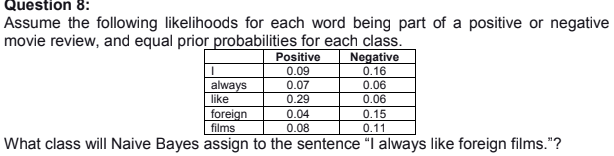

In [ ]:
positive = 0.09 * 0.07 * 0.29 * 0.04 * 0.08
negative = 0.16 * 0.06 * 0.06 * 0.15 * 0.11

if negative > positive:
  print("negative")
elif positive > negative:
  print("positive")
else:
  print("neutral")

negative


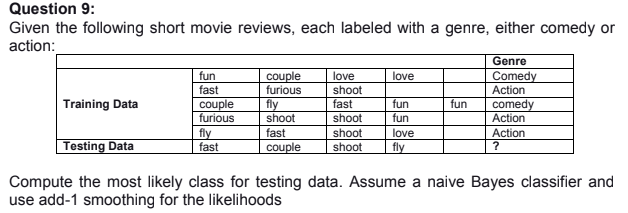

In [2]:
from collections import defaultdict

def preprocess_document(document):
    return document.lower().split()

def calculate_likelihood(word, genre, word_counts, total_words, vocabulary):
    count = word_counts[genre].get(word, 0)
    return (count + 1) / (total_words[genre] + len(vocabulary))

def naive_bayes_classify(testing_data, training_data):
    # Preprocess the testing data
    testing_words = preprocess_document(testing_data)

    # Count the occurrences of each word in the training data
    word_counts = {'Comedy': defaultdict(int), 'Action': defaultdict(int)}
    total_words = {'Comedy': 0, 'Action': 0}
    vocabulary = set()

    for genre, document in training_data:
        words = preprocess_document(document)
        total_words[genre] += len(words)
        for word in words:
            word_counts[genre][word] += 1
            vocabulary.add(word)

    # Calculate the probabilities for both genres
    P_comedy = 2 / 5  # P(Comedy) with add-1 smoothing
    P_action = 3 / 5  # P(Action) with add-1 smoothing

    for word in testing_words:
        P_comedy *= calculate_likelihood(word, 'Comedy', word_counts, total_words, vocabulary)
        P_action *= calculate_likelihood(word, 'Action', word_counts, total_words, vocabulary)

    # Compare the probabilities and determine the most likely class
    if P_comedy > P_action:
        return 'Comedy'
    else:
        return 'Action'

In [3]:
# Sample training data
training_data = [
    ('Comedy', 'fun couple love love'),
    ('Action', 'fast furious shoot'),
    ('Comedy', 'couple fly fast fun fun'),
    ('Action', 'furious shoot shoot fun'),
    ('Action', 'fly fast shoot love'),
]

# Test data
testing_data = 'fast couple shoot fly ?'

# Classify the testing data
result_genre = naive_bayes_classify(testing_data, training_data)
print(f"The most likely genre for the testing data is: {result_genre}")

The most likely genre for the testing data is: Action


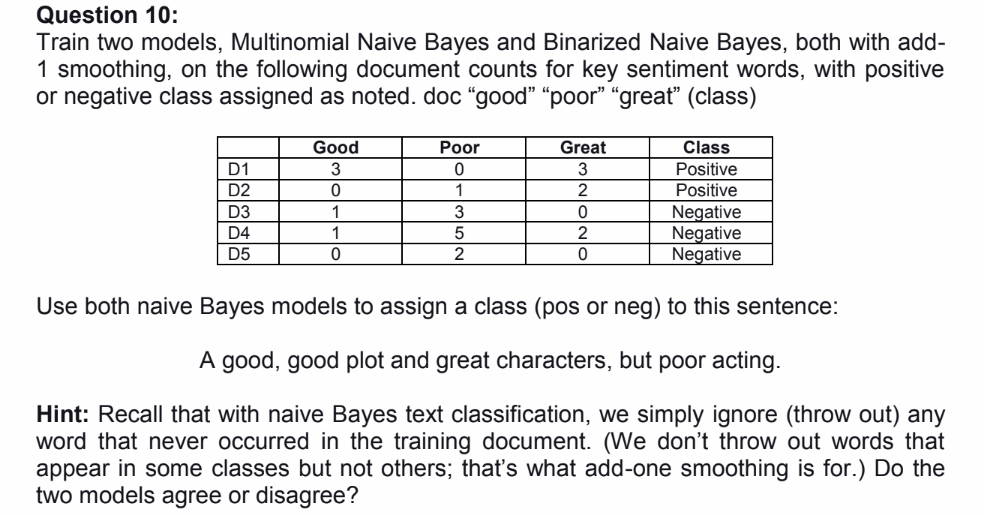

In [8]:
from collections import defaultdict

def multinomial_naive_bayes(training_data, testing_sentence):
    # Preprocess the testing sentence
    testing_words = testing_sentence.lower().split()

    # Count the occurrences of each word in the training data
    word_counts = {'Positive': defaultdict(int), 'Negative': defaultdict(int)}
    total_words = {'Positive': 0, 'Negative': 0}
    vocabulary = set()

    for genre, document in training_data:
        words = document.lower().split()
        total_words[genre] += len(words)
        for word in words:
            word_counts[genre][word] += 1
            vocabulary.add(word)

    # Calculate the probabilities for both genres
    P_positive = 2 / 5  # P(Positive) with add-1 smoothing
    P_negative = 3 / 5  # P(Negative) with add-1 smoothing

    for word in testing_words:
        P_positive *= (word_counts['Positive'].get(word, 0) + 1) / (total_words['Positive'] + len(vocabulary))
        P_negative *= (word_counts['Negative'].get(word, 0) + 1) / (total_words['Negative'] + len(vocabulary))

    return P_positive, P_negative

def binarized_naive_bayes(training_data, testing_sentence):
    # Preprocess the testing sentence
    testing_words = testing_sentence.lower().split()

    # Calculate the number of documents in each class
    num_positive_docs = sum(1 for genre, _ in training_data if genre == 'Positive')
    num_negative_docs = sum(1 for genre, _ in training_data if genre == 'Negative')
    total_docs = num_positive_docs + num_negative_docs

    # Count the occurrences of each word in the training data
    word_counts = {'Positive': defaultdict(int), 'Negative': defaultdict(int)}

    for genre, document in training_data:
        words = document.lower().split()
        for word in words:
            word_counts[genre][word] = 1

    # Calculate the probabilities for both genres
    P_positive = num_positive_docs / total_docs  # P(Positive)
    P_negative = num_negative_docs / total_docs  # P(Negative)

    for word in testing_words:
        P_positive *= (word_counts['Positive'].get(word, 0) + 1) / (num_positive_docs + 2)  # Add-1 smoothing
        P_negative *= (word_counts['Negative'].get(word, 0) + 1) / (num_negative_docs + 2)  # Add-1 smoothing

    return P_positive, P_negative

# Sample training data
training_data = [
    ('Positive', 'good poor great'),
    ('Positive', 'good good great'),
    ('Negative', 'poor poor poor'),
    ('Negative', 'poor poor poor poor poor'),
    ('Negative', 'poor poor'),
]

# Test sentence
testing_sentence = 'A good, good plot and great characters, but poor acting.'

# Classify using Multinomial Naive Bayes
P_positive_multinomial, P_negative_multinomial = multinomial_naive_bayes(training_data, testing_sentence)
print(f"Multinomial Naive Bayes prediction: Positive")
print(f"Probability of Positive class: {P_positive_multinomial:}")
print(f"Probability of Negative class: {P_negative_multinomial:}")

# Classify using Binarized Naive Bayes
P_positive_binarized, P_negative_binarized = binarized_naive_bayes(training_data, testing_sentence)
print(f"Binarized Naive Bayes prediction: Positive")
print(f"Probability of Positive class: {P_positive_binarized:}")
print(f"Probability of Negative class: {P_negative_binarized:}")

Multinomial Naive Bayes prediction: Positive
Probability of Positive class: 2.7532531111607418e-09
Probability of Negative class: 4.787517918902781e-11
Binarized Naive Bayes prediction: Positive
Probability of Positive class: 3.0517578125e-06
Probability of Negative class: 1.2288000000000008e-07
